# Analysis of SARS-COV-2 virus neutalization in different Ace2 clones

### Set up Analysis

In [1]:
import itertools
import math
import os
import re
import warnings

from IPython.display import display, HTML

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import natsort

import numpy as np
import pandas as pd
from plotnine import *
import seaborn

import neutcurve
from neutcurve.colorschemes import CBMARKERS, CBPALETTE

import yaml

In [2]:
warnings.simplefilter('ignore')

Read config file.

In [3]:
with open('config.yaml') as f:
    config = yaml.safe_load(f)

Set seaborn theme:

In [4]:
theme_set(theme_seaborn(style='white', context='talk', font_scale=1))
plt.style.use('seaborn-white')

In [5]:
resultsdir=config['resultsdir']
os.makedirs(resultsdir, exist_ok=True)

## Read in data

In [6]:
# sample_information = (pd.read_csv(config['sample_information'])
#                       .drop_duplicates()
#                      )

frac_infect = list() # create df list

for f in config['depletion_neuts'].keys():
    df = (pd.read_csv(f, index_col=0))
    frac_infect.append(df)  
frac_infect = pd.concat(frac_infect)

frac_infect['serum'] = frac_infect['serum'] + '__' + frac_infect['cells']
fits = neutcurve.CurveFits(frac_infect, fixbottom= False)

## Fit Hill curve to data using [`neutcurve`](https://jbloomlab.github.io/neutcurve/)

In [7]:
# frac_infect_combined = list()

# for cells in frac_infect:
#     fits = neutcurve.CurveFits(cells, fixbottom= False)
#     frac_infect_combined.append(fits)

In [8]:
# fitparams_combined = pd.DataFrame() # create empty data frame


fitparams = (
    fits.fitParams()
    .rename(columns={'virus': 'depletion'})
    [['serum', 'depletion', 'ic50', 'ic50_bound']]
    .assign(NT50=lambda x: 1/x['ic50'])

    )
# fitparams_combined = fitparams_combined.append(fitparams).reset_index(drop=True)
fitparams    



,serum,depletion,ic50,ic50_bound,NT50
0,63C-day-10__very_low_ACE2,pre-depletion,0.000031,interpolated,31968.943613
1,63C-day-10__very_low_ACE2,post-depletion,0.000454,interpolated,2200.799322
2,64C-day-15__very_low_ACE2,pre-depletion,0.000064,interpolated,15594.993852
3,64C-day-15__very_low_ACE2,post-depletion,0.000199,interpolated,5029.538042
4,99C-day-27__very_low_ACE2,pre-depletion,0.000096,interpolated,10374.149491
5,99C-day-27__very_low_ACE2,post-depletion,0.000435,interpolated,2296.488086
6,108C-day-18__very_low_ACE2,pre-depletion,0.000038,interpolated,26336.105034
7,108C-day-18__very_low_ACE2,post-depletion,0.000225,interpolated,4450.299723
8,63C-day-10__low_ACE2,pre-depletion,0.000040,interpolated,24852.475407
9,63C-day-10__low_ACE2,post-depletion,0.000704,interpolated,1420.647038


In [9]:
fitparams['ic50_is_bound'] = fitparams['ic50_bound'].apply(lambda x: True if x!='interpolated' else False)
fitparams

,serum,depletion,ic50,ic50_bound,NT50,ic50_is_bound
0,63C-day-10__very_low_ACE2,pre-depletion,0.000031,interpolated,31968.943613,False
1,63C-day-10__very_low_ACE2,post-depletion,0.000454,interpolated,2200.799322,False
2,64C-day-15__very_low_ACE2,pre-depletion,0.000064,interpolated,15594.993852,False
3,64C-day-15__very_low_ACE2,post-depletion,0.000199,interpolated,5029.538042,False
4,99C-day-27__very_low_ACE2,pre-depletion,0.000096,interpolated,10374.149491,False
5,99C-day-27__very_low_ACE2,post-depletion,0.000435,interpolated,2296.488086,False
6,108C-day-18__very_low_ACE2,pre-depletion,0.000038,interpolated,26336.105034,False
7,108C-day-18__very_low_ACE2,post-depletion,0.000225,interpolated,4450.299723,False
8,63C-day-10__low_ACE2,pre-depletion,0.000040,interpolated,24852.475407,False
9,63C-day-10__low_ACE2,post-depletion,0.000704,interpolated,1420.647038,False


In [10]:
#save data
fitparams.to_csv(config['neuts'], index=False)


In [11]:
fitparams[['sample', 'cells']] = fitparams['serum'].str.split('__', 1, expand=True)


In [12]:
#category for cell order so that ggplot does not use alphabetical
cat_order = ['high_ACE2', 'medium_ACE2', 'low_ACE2', 'very_low_ACE2']
fitparams['category'] = pd.Categorical(fitparams['cells'], categories=cat_order, ordered=True)
fitparams

,serum,depletion,ic50,ic50_bound,NT50,ic50_is_bound,sample,cells,category
0,63C-day-10__very_low_ACE2,pre-depletion,0.000031,interpolated,31968.943613,False,63C-day-10,very_low_ACE2,very_low_ACE2
1,63C-day-10__very_low_ACE2,post-depletion,0.000454,interpolated,2200.799322,False,63C-day-10,very_low_ACE2,very_low_ACE2
2,64C-day-15__very_low_ACE2,pre-depletion,0.000064,interpolated,15594.993852,False,64C-day-15,very_low_ACE2,very_low_ACE2
3,64C-day-15__very_low_ACE2,post-depletion,0.000199,interpolated,5029.538042,False,64C-day-15,very_low_ACE2,very_low_ACE2
4,99C-day-27__very_low_ACE2,pre-depletion,0.000096,interpolated,10374.149491,False,99C-day-27,very_low_ACE2,very_low_ACE2
5,99C-day-27__very_low_ACE2,post-depletion,0.000435,interpolated,2296.488086,False,99C-day-27,very_low_ACE2,very_low_ACE2
6,108C-day-18__very_low_ACE2,pre-depletion,0.000038,interpolated,26336.105034,False,108C-day-18,very_low_ACE2,very_low_ACE2
7,108C-day-18__very_low_ACE2,post-depletion,0.000225,interpolated,4450.299723,False,108C-day-18,very_low_ACE2,very_low_ACE2
8,63C-day-10__low_ACE2,pre-depletion,0.000040,interpolated,24852.475407,False,63C-day-10,low_ACE2,low_ACE2
9,63C-day-10__low_ACE2,post-depletion,0.000704,interpolated,1420.647038,False,63C-day-10,low_ACE2,low_ACE2


## Plot IC50 values

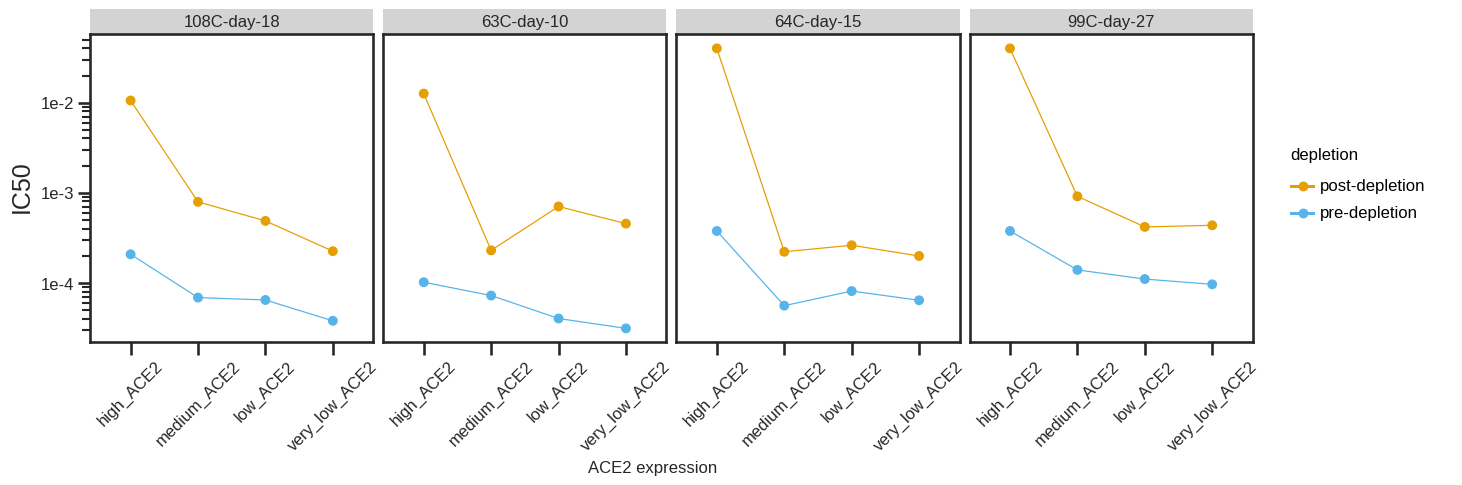

In [13]:
IC50 = (ggplot(fitparams, aes(x='category', y='ic50', colour='depletion', group = 'depletion')) +
              geom_point(size=3) +
        geom_line(alpha=1) +
             theme(figure_size=(15,1*df['serum'].nunique()),
                   axis_text=element_text(size=12),
                   axis_text_x=element_text(size=12, angle= 45),
                   legend_text=element_text(size=12),
                   legend_title=element_text(size=12),
                   axis_title_x=element_text(size=12),
                   strip_text = element_text(size=12)
                  ) +
              facet_wrap('sample', ncol = 4)+
              scale_y_log10(name='IC50') +
              xlab('ACE2 expression') +
             scale_color_manual(values=CBPALETTE[1:])
                 )

_ = IC50.draw()
IC50.save(f'./{resultsdir}/IC50.pdf')

## Plot NT50 values

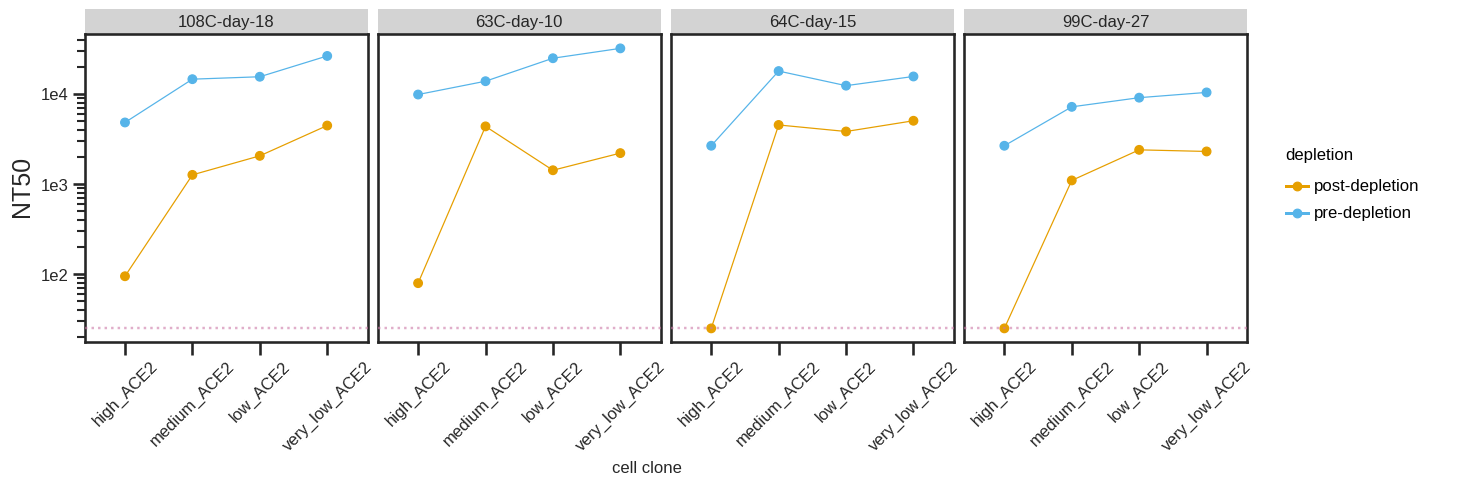

In [14]:
NT50 = (ggplot(fitparams, aes(x='category', y='NT50', colour='depletion', group = 'depletion')) +
              geom_point(size=3) +
             geom_line(alpha=1) +
             theme(figure_size=(15,1*df['serum'].nunique()),
                   axis_text=element_text(size=12),
                   axis_text_x=element_text(size=12, angle= 45),
                   legend_text=element_text(size=12),
                   legend_title=element_text(size=12),
                   axis_title_x=element_text(size=12),
                   strip_text = element_text(size=12)
                  ) +
                geom_hline(yintercept=config['NT50_LOD'], 
                linetype='dotted', 
                size=1, 
                alpha=0.6, 
                color=CBPALETTE[7]) +
              facet_wrap('sample', ncol = 4)+
              scale_y_log10(name='NT50') +
              xlab('cell clone') +
             scale_color_manual(values=CBPALETTE[1:])
                 )

_ = NT50.draw()
NT50.save(f'./{resultsdir}/NT50.pdf')


## Make horizontal line plot connecting pre- and post-IC50

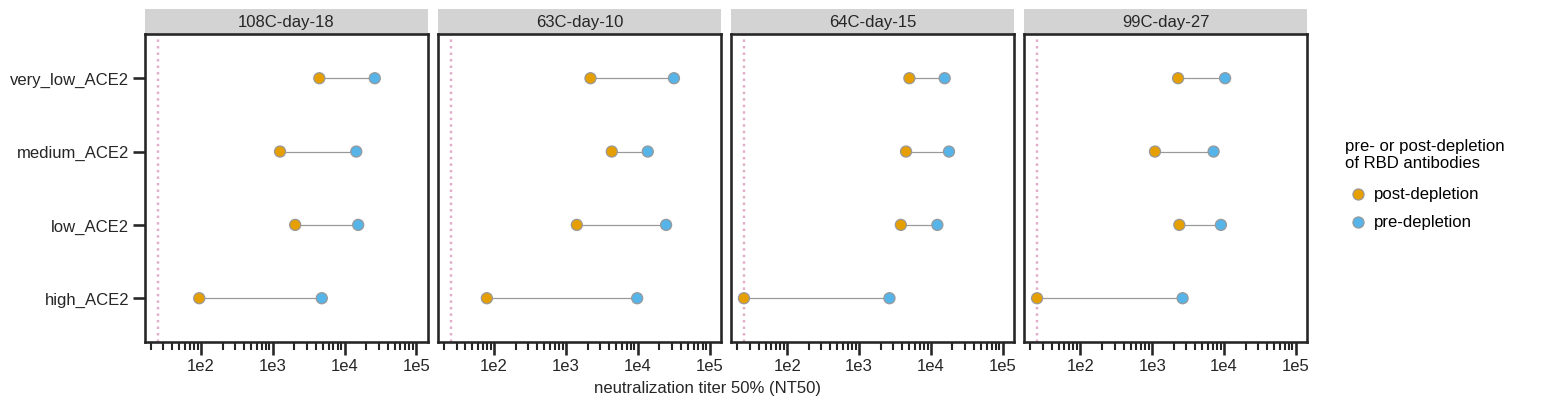

In [15]:
p = (ggplot(fitparams, 
            aes(x='NT50',
                y='cells',
                fill='depletion',
                group='cells',
               )) +
     scale_x_log10(name='neutralization titer 50% (NT50)', 
                   limits=[config['NT50_LOD'],fitparams['NT50'].max()*3]) +
     geom_vline(xintercept=config['NT50_LOD'], 
                linetype='dotted', 
                size=1, 
                alpha=0.6, 
                color=CBPALETTE[7]) +
     geom_line(alpha=1, color=CBPALETTE[0]) +
     geom_point(size=4, color=CBPALETTE[0]) +
     theme(figure_size=(15,1*df['serum'].nunique()),
           axis_text=element_text(size=12),
           legend_text=element_text(size=12),
           legend_title=element_text(size=12),
           axis_title_x=element_text(size=12),
           strip_text = element_text(size=12)
          ) +
     facet_wrap('sample', ncol = 4) +
     ylab('') +
    scale_fill_manual(values=['#E69F00', '#56B4E9', ], 
                     name='pre- or post-depletion\nof RBD antibodies')
    )

_ = p.draw()


## Plot neut curves for all samples

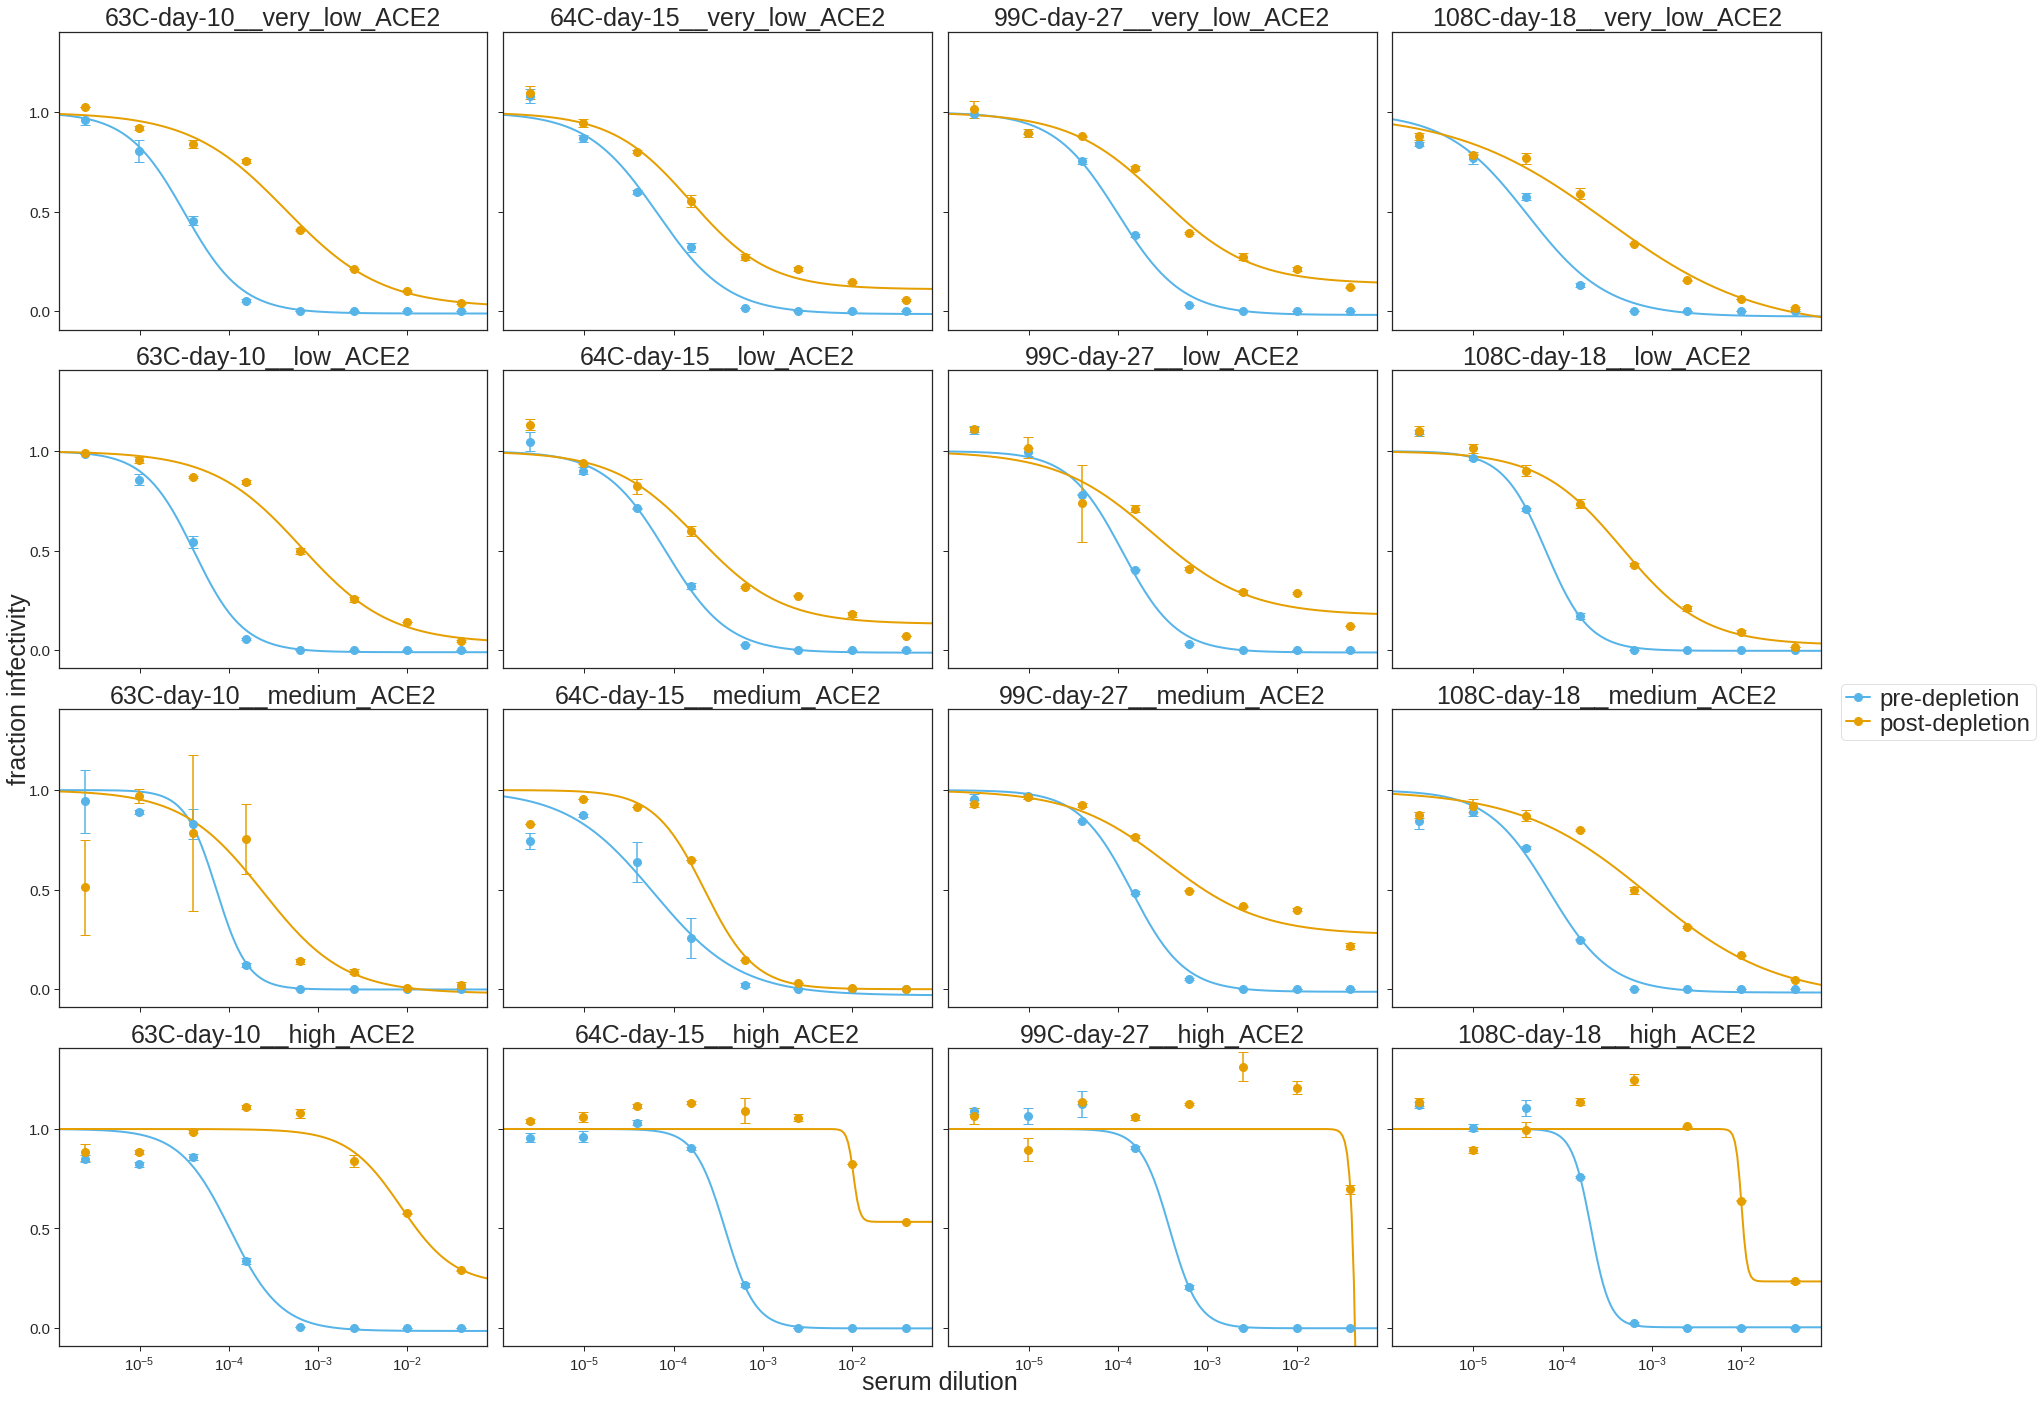

In [16]:
fig, axes = fits.plotSera(
                          xlabel='serum dilution',
                          ncol=4,
                          widthscale=2,
                          heightscale=2,
                          titlesize=25, labelsize=25, ticksize=15, legendfontsize=24, yticklocs=[0,0.5,1],
                          markersize=8, linewidth=2,
                          virus_to_color_marker={
                          'pre-depletion': ('#56B4E9', 'o'),
                          'post-depletion': ('#E69F00', 'o')}
                         )